# **Assignment 2: Content Analysis and Regression**

For this assignment, you need to test a hypothesis using multiple linear regression. Before doing that, you also need to use computational content analysis and NLP techniques to create new variables that you will use as a predictor in the regression model.

##**Research Background**##

According to Chatman (1980), characters are constructs within abstracted narratives, described through networks of personality traits (e.g., Sarrasine is feminine, Othello is jealous, Roland Deschain is brave). Docherty characterizes the process of depicting and interpreting characters in literature as 'characterization' (cited by Bennett and Royle, 2017). Reaske (1996) identifies several devices of characterization, including character appearance, asides and soliloquies, dialogue, hidden narration, language, and actions performed. Characterization is crucial in narrative because it allows readers to relate to characters and feel emotionally engaged in the story (Cohen, 2001). providing information on personalities and behaviors for gender representation analysis in fiction.

For this assignment, you'll work with a corpus of the genre Real Person Fiction (RPF), where characters are characterized by blending real-life traits with fans' interpretations and reimagination, reflecting societal and cultural trends.

On the online fanfiction platform AO3, fanfictions about the Korean boy band BTS represent the largest fandom, surpassing even the Marvel Universe and Harry Potter franchises. Research into the global popularity of the Korean Wave (*Hallyu*) has highlighted the concept of "manufactured versatile masculinity" exhibited by male K-pop idols, a blend of softer, more effeminate appearances or behaviors with traditional forms of hegemonic masculinity, described by scholars such as Jung (2011), Kuo et al. (2020), Kwon (2019), and Oh (2015). Oh (2015) terms this "liminal masculinity," with androgynous K-pop male idols crossing gender lines.

**Aim:**

This assignment aims to analyze the impact of soft masculinity on K-pop fanfiction's success using a corpus of 100 BTS fanfictions.

**Data:**

We will utilize a dataset from the GOLEM project, comprising 100 BTS-related fanfictions, including story ID, publication year, word count, kudos, comments, and story content in English (1,000 to 1,200 words).

**Methods:**
- operationalize the concept of 'soft masculinity' to make it measurable
- use regression analysis to test a hypothesis

In [1]:
from google.colab import drive
import pandas as pd

# Connect to Google Drive
drive.mount('/content/drive')

# Specify the file path
file_path = '/content/drive/My Drive/BTS_short_100.csv'

# Load the dataset
df = pd.read_csv(file_path, encoding="UTF-8")

# Display the first few rows of the dataset
df.head()

Mounted at /content/drive


,story_id,published_year,words,kudos,comments,story_content
0,4706144,2015,1185,249.0,1.0,library snacks & 3AM promises\n\nAuthor's Note...
1,4752980,2015,1164,79.0,NaN,Worry\n\nYou stumbled through the apartment do...
2,4706144,2015,1185,249.0,1.0,library snacks & 3AM promises\n\nAuthor's Note...
3,4621698,2015,1016,105.0,4.0,Mornings\n\nThis is literally trash omg what I...
4,4752980,2015,1164,79.0,NaN,Worry\n\nYou stumbled through the apartment do...


Have you noticed something odd in the first five lines of this dataset?

There are some duplicates.

So first we need to do some data cleaning, checking how many rows are duplicated and deleting the duplicates.


In [2]:
# Get the number of unique rows
unique_story_ids = df['story_id'].nunique()

# Print the result
print(f"The number of unique 'story_id' values is: {unique_story_ids}")

The number of unique 'story_id' values is: 90


In [3]:
# Remove duplicate rows
df = df.drop_duplicates()

df.head()

,story_id,published_year,words,kudos,comments,story_content
0,4706144,2015,1185,249.0,1.0,library snacks & 3AM promises\n\nAuthor's Note...
1,4752980,2015,1164,79.0,NaN,Worry\n\nYou stumbled through the apartment do...
3,4621698,2015,1016,105.0,4.0,Mornings\n\nThis is literally trash omg what I...
5,3651108,2015,1174,339.0,6.0,Purple Gel Pens\n\nAuthor's Note:\n\nwtf is th...
7,5282729,2015,1173,17.0,NaN,"Unspoken Words\n\nYou come back into the flat,..."


In [4]:
# Let's check how many rows there are now
df.shape[0]

90

##**Research Design**##
The steps of this research involve formulating a hypothesis, selecting `kudos` as a proxy for the success of a story -- the dependent variable (Y) -- and calculating a masculinity score to be used as the independent variable (x1). We will also use additional variables that are also likely to have an effect on the success of a story: `publication_year` (x2) - because AO3 user base has grown in time and more recent stories are more likely to receive more kudos simply becasue there are more readers on the platform - and lexical richness (x3) - because it's plausible that a story with a richer vocabulary also has a better style and, therefore, it's liked more by readers.

Note that we don't have variables for `masculinity_score` and `lexical_richness` yet, so we need to calculate them from the text of the stories.

The hypothesis states:

H1: Low levels of masculinity in male characters positively affects fanfiction success when controlling for publication year and lexical richness.

**H0: What is the null hypothesis?**

In [ ]:
# H0 (answer in words):The null hypothesis (H0) is the hypothesis that there is no significant relationship between the level of masculinity in male characters and the success of fanfiction, when controlling for publication year and lexical richness.

##**Compute Masculinity Score**##

To calculate a sterotypical masculinity score, we can refer to older theories of perceived gender identity that probably define gender roles in a stereotypical way. an example of this is the Bem Sex-Role Inventory (BSRI) by Dr. Sandra Lipzits Bem (1974), which classifies personality traits into masculine, feminine, and androgynous.

Bem divides personal traits into 60 traits: 20 masculine traits, 20 feminine traits and 20 neutral traits (see figure below).


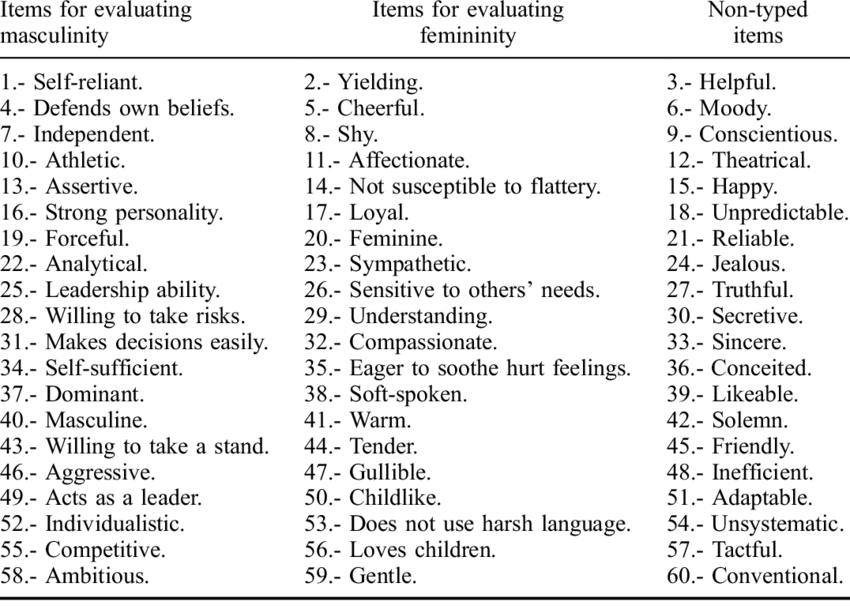

The above list shows that, despite recent discussions about masculinity, femininity, and gender roles have become more diversified, traditional definitions such as those provided by the Bem Sex-Role Inventory (BSRI) can be useful to detect gender stereotypes. Within the definitions of masculinity and femininity outlined by the BSRI, we observe a clear power imbalance: masculinity is associated with dominance (e.g., assertive, strong personality, forceful, leadership ability, dominant, aggressive, ambitious), while femininity leans towards submissiveness (e.g., yielding, understanding, tender). Therefore, we can consider employing the power-agent frames designed by Sap et al. to compute a power score for the male characters in the fanfiction stories. Lower masculinity scores can be plausibly associated with a representation of 'soft masculinity' in relation to a character.

###**Riveter**###

In the W5 lab, we have already gained preliminary experience with the Riveter pipeline.

In this section, we will use utilize the Riveter pipeline with Sap's power-agent frames to calculate the `masculinity_score` for identifiable agents in the text. Since we are interested only in the masculinity of male characters, we will use regular expressions to identify male pronouns (he, him, himself) and calculate their corresponding `masculinity_score`. This score will be added to the df as a new column.


In [ ]:
# Set up everything you need to use Riveter, following the notebook we used in W5 lab
# No need to put the code here, as long as it's working
# We assume that you have installed all the required packages, either locally or on Colab

In [5]:
 !git clone https://github.com/maartensap/riveter-nlp.git

Cloning into 'riveter-nlp'...
remote: Enumerating objects: 610, done.
remote: Counting objects: 100% (218/218), done.
remote: Compressing objects: 100% (108/108), done.
remote: Total 610 (delta 141), reused 164 (delta 109), pack-reused 392
Receiving objects: 100% (610/610), 5.24 MiB | 25.42 MiB/s, done.
Resolving deltas: 100% (374/374), done.


In [6]:
%ls

drive/  riveter-nlp/  sample_data/


In [7]:
!pip install -U spacy-experimental

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 669.5/669.5 kB 12.8 MB/s eta 0:00:00


In [8]:
!pip install --upgrade spacy
# This will downlaod ~500Mb of data
!pip install https://github.com/explosion/spacy-experimental/releases/download/v0.6.0/en_coreference_web_trf-3.4.0a0-py3-none-any.whl#egg=en_coreference_web_trf
!python -m spacy validate
!python -m spacy download en_core_web_sm
!pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 490.3/490.3 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 40.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.5/53.5 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 919.6/919.6 kB 59.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 77.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 81.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.0/314.0 kB 34.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 52.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 51.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 72.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 970.1 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━

Now we have prepared all the dependencies needed.

In [9]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/gdrive')

# Navigate to the directory containing the riveter module
%cd /content/gdrive/MyDrive/riveter

# Now import the Riveter module
from riveter import Riveter

Mounted at /content/gdrive
/content/gdrive/MyDrive/riveter


In [10]:
from collections import defaultdict
import os
import pandas as pd
import random
from riveter import Riveter

import seaborn as sns
import matplotlib.pyplot as plt

**Prepare the corpus**:

First, we can try to initialize two lists to store `story_content` and `story_id`, but this will casue the problem below:

`Token indices sequence length is longer than the specified maximum sequence length for this model (574 > 512).`

This is a limit of the language model (BERT) used by Riveter. We need to split the file into smaller chunks in order for it to be processed correctly. The example in the original Riveter notebook where they load *Pride and Prejudice* shows how we can do this. The code is also provided here below.




In [11]:
def split_text_into_segments(text, max_length=512):
    """
    Segment the text so that each segment contains a maximum of max length tokens.
    """
    segments = []
    current_segment = []
    for word in text.split():
        if len(current_segment) + len(word.split()) <= max_length:
            current_segment.append(word)
        else:
            segments.append(' '.join(current_segment))
            current_segment = [word]
    if current_segment:
        segments.append(' '.join(current_segment))
    return segments

Let's first initialize Riveter with the lexicon that we are going to use:

In [12]:
# Q0 (code): Load lexicon 'power' and create an empty dictionary called 'scores_dict'
riveter = Riveter()
riveter.load_sap_lexicon('power')
scores_dict = {}

Now we can apply the splitting function we defined above and then use Riveter on our corpus. To do this, we need to create a loop that iterates through all the rows in the dataframe and compute scores for each story.

**Q1. Train Riveter to assign scores to text based on male pronouns**

In [13]:
from tqdm import tqdm # used to display a progress bar when executing code

for index, row in tqdm(df.iterrows(), total=df.shape[0], desc="Processing stories"):
    story_id = row['story_id']
    story_content = row['story_content']

    # apply the splitting function:
    segments = split_text_into_segments(story_content)
    text_ids = [f"{story_id}_{i}" for i in range(len(segments))]

    # Q1 (code): train riveter specifying 'persona_patterns_dict= ' to assign scores only based on male pronouns
    # write code below:
    # Define patterns for male pronouns
    riveter.train(segments, text_ids, num_bootstraps=20, persona_patterns_dict={'masculine': r'^he$|^him$|^himself$'})

    # store the computed scores in a dictionary
    persona_score_dict = riveter.get_score_totals()
    masculine_score = persona_score_dict.get('masculine', 0)

    # get a feedback about the computed scores while the code is running
    print(f"Story ID: {story_id}, Masculine Power Score: {masculine_score}")

    # store the score of each story in the same dictionary so that we can then add it to the dataframe
    scores_dict[story_id] = masculine_score

# add the dictionary of scores to the dataframe
df['masculine_power_score'] = df['story_id'].map(scores_dict)

Processing stories:   1%|          | 1/90 [00:31<47:02, 31.72s/it]

2024-03-14 18:10:09 Complete!
Story ID: 4706144, Masculine Power Score: 0.08889948081827946



Processing stories:   2%|▏         | 2/90 [01:01<44:37, 30.43s/it]

2024-03-14 18:10:38 Complete!
Story ID: 4752980, Masculine Power Score: 0.28704645455830125



Processing stories:   3%|▎         | 3/90 [01:27<41:10, 28.40s/it]

2024-03-14 18:11:04 Complete!
Story ID: 4621698, Masculine Power Score: 0.6209523809523809



Processing stories:   4%|▍         | 4/90 [01:55<40:36, 28.33s/it]

2024-03-14 18:11:33 Complete!
Story ID: 3651108, Masculine Power Score: 0.1298117509003059



Processing stories:   6%|▌         | 5/90 [02:25<41:14, 29.11s/it]

2024-03-14 18:12:03 Complete!
Story ID: 5282729, Masculine Power Score: 0.21221445639187575



Processing stories:   7%|▋         | 6/90 [02:58<42:09, 30.11s/it]

2024-03-14 18:12:35 Complete!
Story ID: 5533886, Masculine Power Score: -0.006812169312169311



Processing stories:   8%|▊         | 7/90 [03:29<42:27, 30.69s/it]

2024-03-14 18:13:07 Complete!
Story ID: 4547622, Masculine Power Score: 0.0392094334673894



Processing stories:   9%|▉         | 8/90 [03:57<40:33, 29.68s/it]

2024-03-14 18:13:35 Complete!
Story ID: 16177508, Masculine Power Score: 0.16791944344190418



Processing stories:  10%|█         | 9/90 [04:26<39:39, 29.38s/it]

2024-03-14 18:14:03 Complete!
Story ID: 15745185, Masculine Power Score: -0.09527805223871816



 33%|███▎      | 1/3 [00:14<00:29, 14.77s/it]Token indices sequence length is longer than the specified maximum sequence length for this model (575 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (575 > 512). Running this sequence through the model will result in indexing errors

Processing stories:  11%|█         | 10/90 [04:56<39:36, 29.71s/it]

2024-03-14 18:14:34 Complete!
Story ID: 15654528, Masculine Power Score: 0.19704736304805281



Processing stories:  12%|█▏        | 11/90 [05:24<38:20, 29.12s/it]

2024-03-14 18:15:02 Complete!
Story ID: 7448155, Masculine Power Score: 0.31558247405288264



Processing stories:  13%|█▎        | 12/90 [05:55<38:34, 29.67s/it]

2024-03-14 18:15:33 Complete!
Story ID: 4983847, Masculine Power Score: 0.10640988698535203



Processing stories:  14%|█▍        | 13/90 [06:25<38:09, 29.73s/it]

2024-03-14 18:16:02 Complete!
Story ID: 3313118, Masculine Power Score: -0.22423360154338418



Processing stories:  16%|█▌        | 14/90 [06:54<37:34, 29.67s/it]

2024-03-14 18:16:32 Complete!
Story ID: 3290390, Masculine Power Score: -0.09013516564140188



Processing stories:  17%|█▋        | 15/90 [07:28<38:46, 31.02s/it]

2024-03-14 18:17:06 Complete!
Story ID: 36435301, Masculine Power Score: 0.059558129256271686



Processing stories:  18%|█▊        | 16/90 [07:57<37:15, 30.21s/it]

2024-03-14 18:17:34 Complete!
Story ID: 36575491, Masculine Power Score: 0.26479967706813484



Processing stories:  19%|█▉        | 17/90 [08:25<36:12, 29.76s/it]

2024-03-14 18:18:03 Complete!
Story ID: 35225224, Masculine Power Score: 0.24245439436056443



Processing stories:  20%|██        | 18/90 [08:54<35:22, 29.48s/it]

2024-03-14 18:18:32 Complete!
Story ID: 4594527, Masculine Power Score: 0.22308857808857807



Processing stories:  21%|██        | 19/90 [09:20<33:31, 28.33s/it]

2024-03-14 18:18:58 Complete!
Story ID: 5485625, Masculine Power Score: 0.10809259705811428



Processing stories:  22%|██▏       | 20/90 [09:47<32:33, 27.91s/it]

2024-03-14 18:19:24 Complete!
Story ID: 36408319, Masculine Power Score: 0.14167444755680048



Processing stories:  23%|██▎       | 21/90 [10:20<33:53, 29.47s/it]

2024-03-14 18:19:58 Complete!
Story ID: 35762659, Masculine Power Score: 0.21288039054778668



Processing stories:  24%|██▍       | 22/90 [10:50<33:46, 29.81s/it]

2024-03-14 18:20:28 Complete!
Story ID: 35603194, Masculine Power Score: 0.36579470454721197



Processing stories:  26%|██▌       | 23/90 [11:22<33:47, 30.26s/it]

2024-03-14 18:21:00 Complete!
Story ID: 35344306, Masculine Power Score: 0.11578978852808677



Processing stories:  27%|██▋       | 24/90 [11:47<31:35, 28.71s/it]

2024-03-14 18:21:25 Complete!
Story ID: 36695155, Masculine Power Score: 0.12722222222222226



Processing stories:  28%|██▊       | 25/90 [12:17<31:37, 29.19s/it]

2024-03-14 18:21:55 Complete!
Story ID: 36064474, Masculine Power Score: 0.11074670449187966



Processing stories:  29%|██▉       | 26/90 [12:47<31:11, 29.24s/it]

2024-03-14 18:22:24 Complete!
Story ID: 36024820, Masculine Power Score: 0.144292880091054



Processing stories:  30%|███       | 27/90 [13:21<32:18, 30.76s/it]

2024-03-14 18:22:59 Complete!
Story ID: 35182330, Masculine Power Score: -0.019625195924764888



Processing stories:  31%|███       | 28/90 [13:52<31:47, 30.77s/it]

2024-03-14 18:23:29 Complete!
Story ID: 36567496, Masculine Power Score: 0.21127008345519016



Processing stories:  32%|███▏      | 29/90 [14:20<30:41, 30.19s/it]

2024-03-14 18:23:58 Complete!
Story ID: 35560330, Masculine Power Score: 0.12364123068582271



Processing stories:  33%|███▎      | 30/90 [14:53<30:44, 30.74s/it]

2024-03-14 18:24:30 Complete!
Story ID: 35877496, Masculine Power Score: 0.08133912560416796



Processing stories:  34%|███▍      | 31/90 [15:23<30:11, 30.71s/it]

2024-03-14 18:25:01 Complete!
Story ID: 35957410, Masculine Power Score: 0.28309327169405235



Processing stories:  36%|███▌      | 32/90 [15:51<28:53, 29.89s/it]

2024-03-14 18:25:29 Complete!
Story ID: 30947654, Masculine Power Score: 0.06315582058594763



Processing stories:  37%|███▋      | 33/90 [16:20<28:14, 29.72s/it]

2024-03-14 18:25:58 Complete!
Story ID: 36332707, Masculine Power Score: -0.09903368448478292



Processing stories:  38%|███▊      | 34/90 [16:52<28:07, 30.14s/it]

2024-03-14 18:26:29 Complete!
Story ID: 35967940, Masculine Power Score: 0.17320834250999917



Processing stories:  39%|███▉      | 35/90 [17:22<27:46, 30.30s/it]

2024-03-14 18:27:00 Complete!
Story ID: 35001073, Masculine Power Score: 0.09464757464757464



Processing stories:  40%|████      | 36/90 [17:53<27:21, 30.39s/it]

2024-03-14 18:27:31 Complete!
Story ID: 35138911, Masculine Power Score: 0.13720081847525706



Processing stories:  41%|████      | 37/90 [18:19<25:43, 29.12s/it]

2024-03-14 18:27:57 Complete!
Story ID: 35280397, Masculine Power Score: 0.23118480861244017



Processing stories:  42%|████▏     | 38/90 [18:53<26:28, 30.54s/it]

2024-03-14 18:28:31 Complete!
Story ID: 36049939, Masculine Power Score: 0.27767565224125595



Processing stories:  43%|████▎     | 39/90 [19:26<26:32, 31.22s/it]

2024-03-14 18:29:03 Complete!
Story ID: 34995673, Masculine Power Score: 0.15150137371310515



Processing stories:  44%|████▍     | 40/90 [19:59<26:34, 31.88s/it]

2024-03-14 18:29:37 Complete!
Story ID: 33477346, Masculine Power Score: 0.4464008295625943



Processing stories:  46%|████▌     | 41/90 [20:26<24:45, 30.32s/it]

2024-03-14 18:30:04 Complete!
Story ID: 36840832, Masculine Power Score: -0.1991916124810862



Processing stories:  47%|████▋     | 42/90 [20:52<23:09, 28.95s/it]

2024-03-14 18:30:29 Complete!
Story ID: 30896276, Masculine Power Score: 0.012857142857142855



Processing stories:  48%|████▊     | 43/90 [21:17<21:57, 28.02s/it]

2024-03-14 18:30:55 Complete!
Story ID: 37363471, Masculine Power Score: 0.41239462292093865



Processing stories:  49%|████▉     | 44/90 [21:44<21:15, 27.74s/it]

2024-03-14 18:31:22 Complete!
Story ID: 36984901, Masculine Power Score: 0.0666125810829001



Processing stories:  50%|█████     | 45/90 [22:12<20:45, 27.69s/it]

2024-03-14 18:31:50 Complete!
Story ID: 33353644, Masculine Power Score: 0.014644403413826283



Processing stories:  51%|█████     | 46/90 [22:41<20:36, 28.11s/it]

2024-03-14 18:32:19 Complete!
Story ID: 37002835, Masculine Power Score: -0.14487030513346302



Processing stories:  52%|█████▏    | 47/90 [23:08<19:47, 27.61s/it]

2024-03-14 18:32:45 Complete!
Story ID: 5630824, Masculine Power Score: 0.3001949317738791



Processing stories:  53%|█████▎    | 48/90 [23:37<19:43, 28.18s/it]

2024-03-14 18:33:15 Complete!
Story ID: 10053617, Masculine Power Score: 0.21919187258291065



Processing stories:  54%|█████▍    | 49/90 [24:04<19:05, 27.95s/it]

2024-03-14 18:33:42 Complete!
Story ID: 1572659, Masculine Power Score: 0.2413716920334567



Processing stories:  56%|█████▌    | 50/90 [24:35<19:06, 28.67s/it]

2024-03-14 18:34:13 Complete!
Story ID: 7450573, Masculine Power Score: 0.38934389140271486



Processing stories:  57%|█████▋    | 51/90 [25:05<18:54, 29.10s/it]

2024-03-14 18:34:43 Complete!
Story ID: 6918676, Masculine Power Score: 0.03148593626927276



Processing stories:  58%|█████▊    | 52/90 [25:38<19:08, 30.23s/it]

2024-03-14 18:35:16 Complete!
Story ID: 6075402, Masculine Power Score: 0.3665789144504928



Processing stories:  59%|█████▉    | 53/90 [26:09<18:47, 30.48s/it]

2024-03-14 18:35:47 Complete!
Story ID: 11101779, Masculine Power Score: 0.3396857528436476



Processing stories:  60%|██████    | 54/90 [26:42<18:50, 31.41s/it]

2024-03-14 18:36:20 Complete!
Story ID: 11321331, Masculine Power Score: 0.08697397490103523



Processing stories:  61%|██████    | 55/90 [27:10<17:33, 30.11s/it]

2024-03-14 18:36:47 Complete!
Story ID: 12284853, Masculine Power Score: 0.07780450207425572



Processing stories:  62%|██████▏   | 56/90 [27:37<16:37, 29.33s/it]

2024-03-14 18:37:15 Complete!
Story ID: 12282003, Masculine Power Score: 0.08342362655464954



Processing stories:  63%|██████▎   | 57/90 [28:03<15:35, 28.36s/it]

2024-03-14 18:37:41 Complete!
Story ID: 7613533, Masculine Power Score: 0



Processing stories:  64%|██████▍   | 58/90 [28:29<14:47, 27.74s/it]

2024-03-14 18:38:07 Complete!
Story ID: 4228053, Masculine Power Score: 0.21540625157804377



Processing stories:  66%|██████▌   | 59/90 [28:59<14:39, 28.37s/it]

2024-03-14 18:38:37 Complete!
Story ID: 12127317, Masculine Power Score: 0.13121463958124574



Processing stories:  67%|██████▋   | 60/90 [29:25<13:44, 27.47s/it]

2024-03-14 18:39:02 Complete!
Story ID: 12010134, Masculine Power Score: 0.17777427176404156



Processing stories:  68%|██████▊   | 61/90 [29:57<13:58, 28.91s/it]

2024-03-14 18:39:35 Complete!
Story ID: 11510919, Masculine Power Score: 0.4720698620847178



Processing stories:  69%|██████▉   | 62/90 [30:26<13:33, 29.06s/it]

2024-03-14 18:40:04 Complete!
Story ID: 8145802, Masculine Power Score: 0.22128149574286998



Processing stories:  70%|███████   | 63/90 [30:54<12:56, 28.76s/it]

2024-03-14 18:40:32 Complete!
Story ID: 6637942, Masculine Power Score: -0.11117185446833196



Processing stories:  71%|███████   | 64/90 [31:22<12:15, 28.29s/it]

2024-03-14 18:40:59 Complete!
Story ID: 7427905, Masculine Power Score: -0.025783577695342397



Processing stories:  72%|███████▏  | 65/90 [31:49<11:37, 27.91s/it]

2024-03-14 18:41:26 Complete!
Story ID: 3893857, Masculine Power Score: 0.1325725633725681



Processing stories:  73%|███████▎  | 66/90 [32:16<11:05, 27.75s/it]

2024-03-14 18:41:54 Complete!
Story ID: 33040258, Masculine Power Score: 0.2317063492063492



Processing stories:  74%|███████▍  | 67/90 [32:48<11:05, 28.95s/it]

2024-03-14 18:42:25 Complete!
Story ID: 33858850, Masculine Power Score: -0.1752757858279014



Processing stories:  76%|███████▌  | 68/90 [33:18<10:44, 29.31s/it]

2024-03-14 18:42:56 Complete!
Story ID: 2775776, Masculine Power Score: 0.22966672216672218



Processing stories:  77%|███████▋  | 69/90 [33:48<10:23, 29.67s/it]

2024-03-14 18:43:26 Complete!
Story ID: 3197963, Masculine Power Score: 0.3149145299145299



Processing stories:  78%|███████▊  | 70/90 [34:17<09:45, 29.27s/it]

2024-03-14 18:43:54 Complete!
Story ID: 12395199, Masculine Power Score: 0.16496607008283187



Processing stories:  79%|███████▉  | 71/90 [34:43<08:58, 28.36s/it]

2024-03-14 18:44:21 Complete!
Story ID: 10934010, Masculine Power Score: 0.247740638990639



Processing stories:  80%|████████  | 72/90 [35:09<08:18, 27.70s/it]

2024-03-14 18:44:47 Complete!
Story ID: 12301116, Masculine Power Score: -0.0018819421295438934



Processing stories:  81%|████████  | 73/90 [35:37<07:53, 27.83s/it]

2024-03-14 18:45:15 Complete!
Story ID: 12706317, Masculine Power Score: -0.07873830565472396



Processing stories:  82%|████████▏ | 74/90 [36:08<07:41, 28.84s/it]

2024-03-14 18:45:46 Complete!
Story ID: 11499468, Masculine Power Score: 0.04659634405306396



Processing stories:  83%|████████▎ | 75/90 [36:35<07:01, 28.07s/it]

2024-03-14 18:46:12 Complete!
Story ID: 12184146, Masculine Power Score: 0.36493376586627857



Processing stories:  84%|████████▍ | 76/90 [37:04<06:37, 28.41s/it]

2024-03-14 18:46:42 Complete!
Story ID: 12201333, Masculine Power Score: 0.09168783806626099



Processing stories:  86%|████████▌ | 77/90 [37:37<06:28, 29.92s/it]

2024-03-14 18:47:15 Complete!
Story ID: 11496030, Masculine Power Score: -0.020176626618817285



Processing stories:  87%|████████▋ | 78/90 [38:08<05:59, 30.00s/it]

2024-03-14 18:47:45 Complete!
Story ID: 11510277, Masculine Power Score: 0.2517291963360861



Processing stories:  88%|████████▊ | 79/90 [38:40<05:36, 30.63s/it]

2024-03-14 18:48:17 Complete!
Story ID: 10772274, Masculine Power Score: 0.40699645414254054



Processing stories:  89%|████████▉ | 80/90 [39:10<05:04, 30.49s/it]

2024-03-14 18:48:48 Complete!
Story ID: 12646050, Masculine Power Score: 0.04245244349733514



Processing stories:  90%|█████████ | 81/90 [39:39<04:31, 30.15s/it]

2024-03-14 18:49:17 Complete!
Story ID: 11161479, Masculine Power Score: -0.024616715431157937



Processing stories:  91%|█████████ | 82/90 [40:07<03:56, 29.55s/it]

2024-03-14 18:49:45 Complete!
Story ID: 12069936, Masculine Power Score: 0.059279509100937676



Processing stories:  92%|█████████▏| 83/90 [40:38<03:29, 29.98s/it]

2024-03-14 18:50:16 Complete!
Story ID: 12285972, Masculine Power Score: 0.373452043457287



Processing stories:  93%|█████████▎| 84/90 [41:06<02:55, 29.22s/it]

2024-03-14 18:50:43 Complete!
Story ID: 12372702, Masculine Power Score: -0.02667432859865228



Processing stories:  94%|█████████▍| 85/90 [41:36<02:27, 29.49s/it]

2024-03-14 18:51:14 Complete!
Story ID: 12610496, Masculine Power Score: 0.0980954770683206



Processing stories:  96%|█████████▌| 86/90 [42:06<01:58, 29.66s/it]

2024-03-14 18:51:44 Complete!
Story ID: 10970472, Masculine Power Score: 0.1281806156806157



Processing stories:  97%|█████████▋| 87/90 [42:32<01:25, 28.63s/it]

2024-03-14 18:52:10 Complete!
Story ID: 12084552, Masculine Power Score: 0.33640240120503273



Processing stories:  98%|█████████▊| 88/90 [43:06<01:00, 30.17s/it]

2024-03-14 18:52:44 Complete!
Story ID: 12727119, Masculine Power Score: 0.004083197956809772



Processing stories:  99%|█████████▉| 89/90 [43:34<00:29, 29.53s/it]

2024-03-14 18:53:12 Complete!
Story ID: 11962824, Masculine Power Score: 0.0



Processing stories: 100%|██████████| 90/90 [44:04<00:00, 29.38s/it]

2024-03-14 18:53:42 Complete!
Story ID: 10859508, Masculine Power Score: 0.24539832414747303


**Q2. Print a sample of the dataframe to check whether the `masculine_power_score` has been added correctly**

In [14]:
# Q2 (code)
# Print a sample of the dataframe to check whether the "masculine_power_score" has been added correctly
print(df.head())

   story_id  published_year  words  kudos  comments  \
0   4706144            2015   1185  249.0       1.0   
1   4752980            2015   1164   79.0       NaN   
3   4621698            2015   1016  105.0       4.0   
5   3651108            2015   1174  339.0       6.0   
7   5282729            2015   1173   17.0       NaN   

                                       story_content  masculine_power_score  
0  library snacks & 3AM promises\n\nAuthor's Note...               0.088899  
1  Worry\n\nYou stumbled through the apartment do...               0.287046  
3  Mornings\n\nThis is literally trash omg what I...               0.620952  
5  Purple Gel Pens\n\nAuthor's Note:\n\nwtf is th...               0.129812  
7  Unspoken Words\n\nYou come back into the flat,...               0.212214  


In [15]:
# If you use google colab, it's better to save this result locally in case the connection breaks and then you lose the result.
df.to_csv('/content/df.csv', index=False)

##**Compute Lexical Richness Score**##

'Lexical richness' refers to the range and variety of vocabulary deployed in a text by a speaker/writer. 'Lexical richness' is a term used interchangeably with 'lexical diversity', 'lexical variation', 'lexical density', and 'vocabulary richnes', and it's measured by a wide variety of indices. Uses include (but are not limited to) measuring writing quality, vocabulary knowledge, speaker competence, and socioeconomic status.


The type-token ratio (TTR) is a simple measure of lexical diversity within a text. It is calculated by dividing the number of unique words (types) by the total number of words (tokens) in the given text. A higher TTR indicates a greater variety of vocabulary, suggesting richer lexical content. Conversely, a lower TTR suggests more repetitive use of vocabulary. TTR is often used to assess the lexical complexity of written or spoken material.

Here we use the package `lexicalrichness` (https://pypi.org/project/lexicalrichness/) to compute type-token ratio (TTR) for each story as a control on their language quality.

In [16]:
!pip install lexicalrichness

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.8/97.8 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lexicalrichness: filename=lexicalrichness-0.5.1-py3-none-any.whl size=15417 sha256=1d02458bcc4680ba99e6d231aa0a4671cacc0db61cabb808cea9fd2bb6ff2ee6
  Stored in directory: /root/.cache/pip/wheels/cd/ba/80/d4dabc1bf242a672ffc00226a2303a7471bb841c0872b2c212
Successfully built lexicalrichness


In [17]:
from lexicalrichness import LexicalRichness

# Define a function that calculates the lexical richness of the text
def calculate_lexical_richness(text):
    # Create a LexicalRichness object for the text
    lex = LexicalRichness(text)
    # Compute type-token ratio (TTR)
    return lex.ttr  # Returns the type-token ratio

# Apply the function to the 'story content' column in the DataFrame
df['lexical_richness'] = df['story_content'].apply(calculate_lexical_richness)

# Display the DataFrame with the new 'lexical_richness' column
df.head()

,story_id,published_year,words,kudos,comments,story_content,masculine_power_score,lexical_richness
0,4706144,2015,1185,249.0,1.0,library snacks & 3AM promises\n\nAuthor's Note...,0.088899,0.428571
1,4752980,2015,1164,79.0,NaN,Worry\n\nYou stumbled through the apartment do...,0.287046,0.400665
3,4621698,2015,1016,105.0,4.0,Mornings\n\nThis is literally trash omg what I...,0.620952,0.428986
5,3651108,2015,1174,339.0,6.0,Purple Gel Pens\n\nAuthor's Note:\n\nwtf is th...,0.129812,0.412295
7,5282729,2015,1173,17.0,NaN,"Unspoken Words\n\nYou come back into the flat,...",0.212214,0.376110


Now that we have both the two new variables added to the dataframe, we have all we need to test our hypothesis with linear regression.

##**Regressions**##


**Methodology**

- Multiple Linear Regression: Perform a regression analysis with `kudos` as the dependent variable and `masculine_power_score`, `published_year`, and `words` as independent variables.
- Residual Analysis: Conduct normality and homoscedasticity tests on the residuals to validate the assumptions of linear regression.
- Model Evaluation: Assess the model using adjusted R-squared, F-test, and t-tests for individual coefficients.
- Multicollinearity Check: Calculate the Variance Inflation Factor (VIF) for the independent variables to detect possible multicollinearity.

**Q3. Check the data distribution and handle missing values**


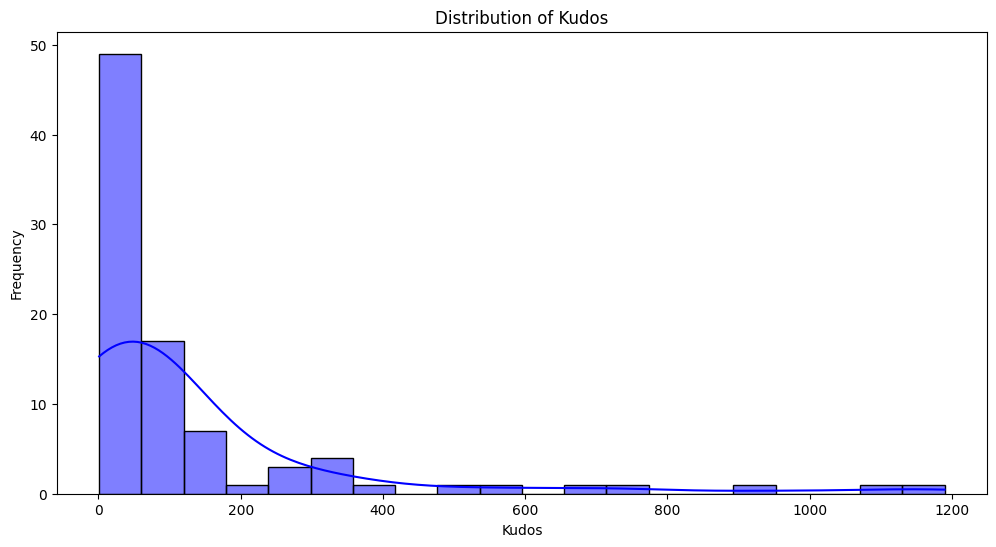

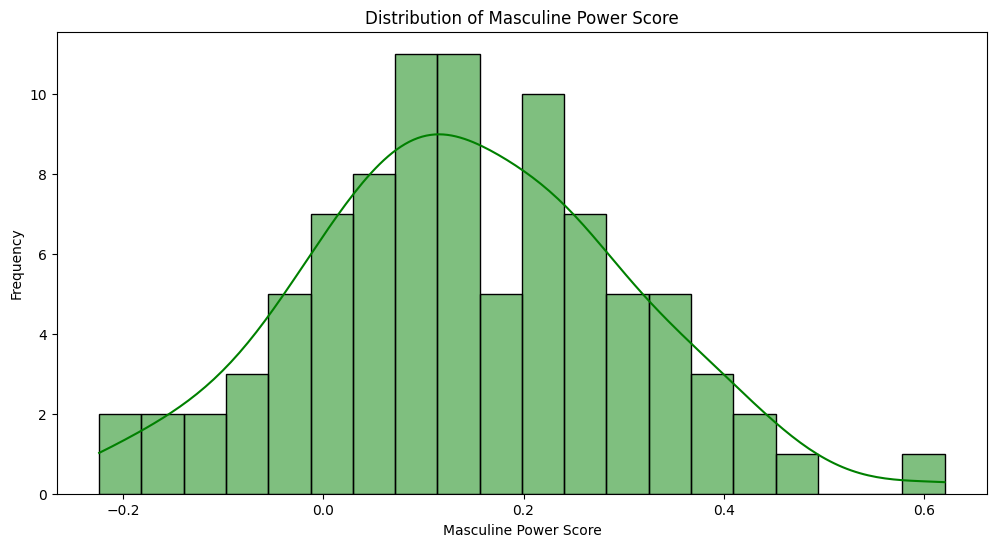

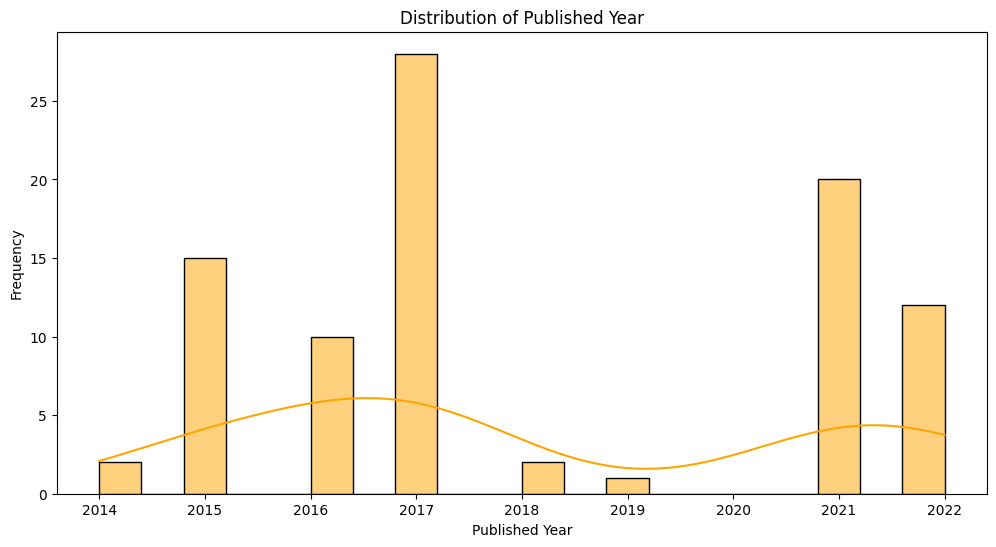

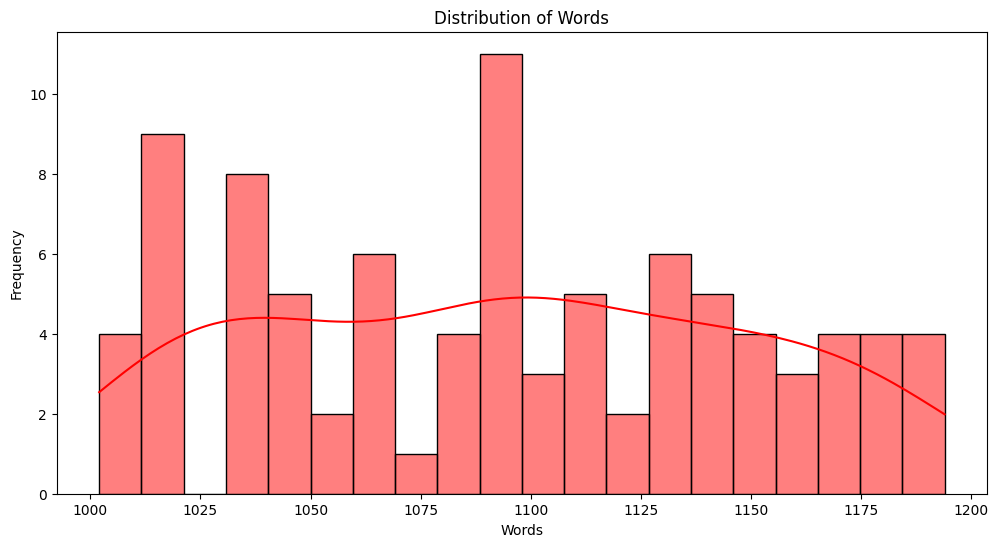

Missing Values:
story_id                  0
published_year            0
words                     0
kudos                     1
comments                 25
story_content             0
masculine_power_score     0
lexical_richness          0
dtype: int64


In [18]:
# Q3a (code): Check data distribution
# Check Data Distribution
# Visualize the distribution of variables
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.histplot(df['kudos'], kde=True, color='blue', bins=20)
plt.title('Distribution of Kudos')
plt.xlabel('Kudos')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(df['masculine_power_score'], kde=True, color='green', bins=20)
plt.title('Distribution of Masculine Power Score')
plt.xlabel('Masculine Power Score')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(df['published_year'], kde=True, color='orange', bins=20)
plt.title('Distribution of Published Year')
plt.xlabel('Published Year')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(df['words'], kde=True, color='red', bins=20)
plt.title('Distribution of Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()
# Step 2: Handle Missing Values
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

In [19]:
# Q3b (code): compute some descriptive statistics
# Compute descriptive statistics
descriptive_stats = df.describe()

# Display descriptive statistics
print("Descriptive Statistics:")
print(descriptive_stats)

Descriptive Statistics:
           story_id  published_year        words        kudos   comments  \
count  9.000000e+01       90.000000    90.000000    89.000000  65.000000   
mean   1.839576e+07     2018.088889  1094.344444   135.393258   6.923077   
std    1.307922e+07        2.612177    55.327048   229.972311   7.005149   
min    1.572659e+06     2014.000000  1002.000000     1.000000   1.000000   
25%    7.448760e+06     2016.000000  1042.250000    20.000000   2.000000   
50%    1.224167e+07     2017.000000  1095.000000    54.000000   5.000000   
75%    3.517148e+07     2021.000000  1141.750000   122.000000   9.000000   
max    3.736347e+07     2022.000000  1194.000000  1190.000000  36.000000   

       masculine_power_score  lexical_richness  
count              90.000000         90.000000  
mean                0.142705          0.405027  
std                 0.160110          0.037109  
min                -0.224234          0.264443  
25%                 0.040020          0.384458

In [20]:
# Q3c (code): Check for any missing values
# Check for missing values
missing_values = df.isnull().sum()

# Display missing values
print("Missing Values:")
print(missing_values)

Missing Values:
story_id                  0
published_year            0
words                     0
kudos                     1
comments                 25
story_content             0
masculine_power_score     0
lexical_richness          0
dtype: int64


In [21]:
# Q3d (code): replace all the NA values with zeros and check again Q3c
# Replace NaN values with zeros
df.fillna(0, inplace=True)

# Check for missing values again
missing_values_after_fillna = df.isnull().sum()

# Display missing values after filling with zeros
print("Missing Values after filling with zeros:")
print(missing_values_after_fillna)

Missing Values after filling with zeros:
story_id                 0
published_year           0
words                    0
kudos                    0
comments                 0
story_content            0
masculine_power_score    0
lexical_richness         0
dtype: int64


It's always important to visualize the data to inspect the distributions of values for the variables your interested in (do you remember the dinosaur data shown in class?).

**Q4. Create a scatterplot with `masculine_power_score` and `kudos`**

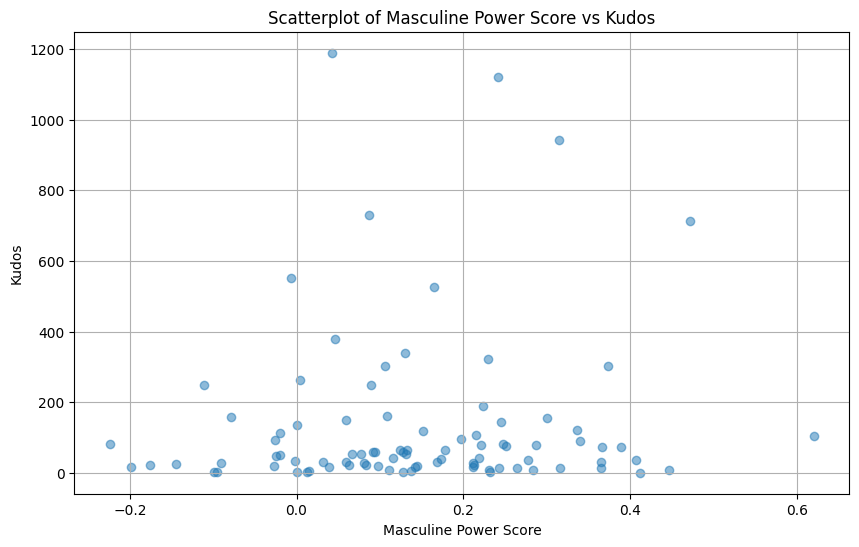

In [22]:
# Q4 (code): Create a scatterplot with masculine_power_score and kudos
import matplotlib.pyplot as plt
# Create a scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(df['masculine_power_score'], df['kudos'], alpha=0.5)
plt.title('Scatterplot of Masculine Power Score vs Kudos')
plt.xlabel('Masculine Power Score')
plt.ylabel('Kudos')
plt.grid(True)
plt.show()

**Q5. Multiple Regression and Analysis**

In [23]:
# Q5 (code): Do OLS Multiple Regression and print the regression result summary
import statsmodels.api as sm

# Define the independent variables (features)
X = df[['masculine_power_score', 'published_year', 'words']]

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Define the dependent variable
y = df['kudos']

# Fit the OLS regression model
model = sm.OLS(y, X).fit()

# Print the regression result summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  kudos   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     5.617
Date:                Thu, 14 Mar 2024   Prob (F-statistic):            0.00145
Time:                        18:58:47   Log-Likelihood:                -608.23
No. Observations:                  90   AIC:                             1224.
Df Residuals:                      86   BIC:                             1234.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  6.974e+

**Q6. Interpret the results of the regression analysis**

In [ ]:
# Q6a (words): Interpret the R-squared and Adj. R-squared
#The R-squared value of 0.164 indicates that approximately 16.4% of the variability in the number of kudos can be explained by the model's predictors. However, the adjusted R-squared value of 0.135 suggests that when considering the number of predictors in the model and the number of observations, the model's explanatory power decreases slightly. This implies that around 13.5% of the variability in kudos can be explained by the independent variables, adjusted for the number of terms in the model. It's essential to note that although the model explains a portion of the variability, a significant amount of variation in kudos remains unexplained.

In [ ]:
# Q6b (words): Interpret F-test result
#The F-statistic tests the overall significance of the model by comparing the variance explained by the model to the variance not explained. In this case, the F-statistic is 5.617, and its associated p-value is 0.00145. Since the p-value is less than the significance level (usually 0.05), we reject the null hypothesis, indicating that the overall model is statistically significant compared to a model without any predictors. This means that at least one of the predictors in the model has a non-zero coefficient.

In [ ]:
# Q6c (words): Interpret coefficients and t-test result
#Constant (const): The constant term of approximately 69,740 is statistically significant (p-value < 0.001), suggesting that when all other variables are held constant, this represents the base number of kudos.
#Masculine Power Score (masculine_power_score): The coefficient of 62.9838 is not statistically significant (p-value 0.658) with a wide confidence interval (-218.738 to 344.705), indicating that the masculine power score does not significantly impact the number of kudos in the given dataset.
#Published Year (published_year): The coefficient of -34.3301 is statistically significant (p-value < 0.001), suggesting that more recent stories tend to have fewer kudos.
#Words: The coefficient of -0.3069 is not statistically significant (p-value 0.454), suggesting that the number of words does not significantly affect the number of kudos.

Based on the OLS regression results provided, here is an example analysis:

The model's R-squared value of 0.162 indicates that approximately 16.2% of the variability in the kudos can be explained by the model. While this suggests that the model explains a portion of the variability, there remains a significant amount unaccounted for, which might be explained by factors not included in the model.

The adjusted R-squared value of 0.133 takes into account the number of predictors in the model and the number of observations, showing a slight decrease from the R-squared value, which is normal as it adjusts for the number of terms in the model.

Looking at the coefficients:

const (6.995e+04): The constant term is significantly different from zero, which may represent the base number of kudos when all other variables are held at zero.
masculine_power_score (59.7927): This variable is not statistically significant (p-value 0.668) with a wide confidence interval, suggesting that the masculine power score does not significantly impact the number of kudos in the given dataset.
lexical_richness (390.3633): Similar to the masculine power score, lexical richness does not appear to significantly affect the number of kudos (p-value 0.524).
published_year (-34.6801): This is the only variable with a statistically significant coefficient (p-value < 0.001), indicating that more recent stories tend to have fewer kudos.
The large F-statistic (5.561) and its associated low probability (0.00155) suggest that the overall model is statistically significant compared to a model without any predictors.

**Q7: Residual Analysis**

Normality Test, Homoscedasticity Test

In [24]:
# Q7a (code): Calculate residuals and do a Shapiro-Wilk Test
from scipy import stats

# Calculate residuals
residuals = model.resid

# Perform Shapiro-Wilk test for normality
shapiro_test = stats.shapiro(residuals)

# Print Shapiro-Wilk test results
print("Shapiro-Wilk Test Results:")
print("Test Statistic:", shapiro_test.statistic)
print("p-value:", shapiro_test.pvalue)

Shapiro-Wilk Test Results:
Test Statistic: 0.6958329081535339
p-value: 2.3209990786948742e-12


In [ ]:
# Q7b (words): Write your analysis for the Normality Test there:
#The test statistic is approximately 0.696, and the associated p-value is approximately 2.32e-12.
#With such a small p-value (much less than the typical significance level of 0.05), the null hypothesis is rejected. This indicates strong evidence against the assumption that the residuals follow a normal distribution.
#Therefore, based on the Shapiro-Wilk test, it is concluded that the residuals do not follow a normal distribution. This suggests that there may be some departures from normality in the residuals, which should be taken into consideration when interpreting the results of the regression analysis.

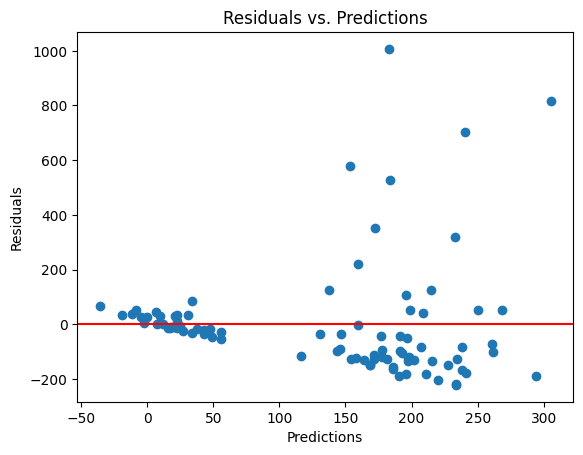

In [25]:
# Q7c (code): Homoscedasticity Test (plot residuals vs. predictions)
# Get predictions from the model
predictions = model.predict()

# Plot residuals against predictions
plt.scatter(predictions, residuals)
plt.title('Residuals vs. Predictions')
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='-')  # Add horizontal line at y=0 for reference
plt.show()

In the residuals vs. predicted values plot, you would look for patterns. In a well-fitted model, you would expect to see the residuals randomly scattered around zero, with no clear pattern. The presence of a pattern might suggest issues with model specification, such as non-linearity or heteroscedasticity.

In [ ]:
# Q7d (words): Write your analysis for the Homoscedasticity Test here:
#The plot presented illustrates a scatter of residuals versus predicted values, a common method for evaluating homoscedasticity in a regression model.
#Homoscedasticity implies that the variances of the residuals remain constant across all levels of the predicted values. Put differently, the spread of the residuals should be consistent throughout the range of predictions.
#Upon analyzing the plot, here are the observations regarding the homoscedasticity condition:
##Spread of Residuals: Ideally, the residuals should exhibit random dispersion around the horizontal axis (marked by the dashed red line in this case). However, the plot reveals a noticeable pattern where the spread of residuals widens as the predicted values increase. This pattern suggests heteroscedasticity, indicating that the variance of the residuals is not constant.
##Trends: An ideal scatterplot would not exhibit any discernible patterns or trends. Nevertheless, a subtle funnel shape is evident in this plot, indicating that the residuals become increasingly dispersed as the predicted values rise. Such a trend signifies that the variance of the residuals grows with the predicted values, indicative of heteroscedasticity.
##outliers: Notably, several points with exceptionally high residuals are visible, particularly for higher predicted values. These outliers possess the potential to significantly influence the regression analysis and might serve as a source of heteroscedasticity.
#This analysis suggests that the assumption of homoscedasticity may be violated in the regression model, given the observed patterns and outliers in the scatterplot of residuals versus predicted values.

**Q8: Multicollinearity**

In [38]:
# Q8a (code)
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Calculate VIF for each independent variable
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print the VIF results
print("VIF Results:")
print(vif)

VIF Results:
                Features     VIF Factor
0                  const  609455.530839
1  masculine_power_score       1.011573
2         published_year       1.010585
3       lexical_richness       1.004479


Regarding multicollinearity, the VIF values for masculine_power_score, lexical_richness, and published_year are close to 1, which suggests low multicollinearity. However, the very high VIF for the const term, along with the large condition number, suggests that there may be numerical issues, possibly due to a large scale difference between predictors or multicollinearity issues not captured by standard VIF calculations.

In [ ]:
# Q8b (words): Write your analysis for the multicollinearity test here:
#The Variance Inflation Factor (VIF) results indicate that the VIF values for the predictors "masculine_power_score," "lexical_richness," and "published_year" are close to 1, suggesting low multicollinearity among these variables.
#However, it's important to note the very high VIF for the constant term, along with the large condition number (as observed in the output). This suggests potential numerical issues, possibly stemming from either a large scale difference between predictors or multicollinearity issues not adequately captured by standard VIF calculations.
#The high VIF for the constant term may be attributed to its nature as a constant, leading to its inflated VIF value. While the constant term is not a predictor in the traditional sense, its presence in the model can still impact the estimation of VIF values for other predictors.

**Q9: Reflection**

In [ ]:
# Q9 (words): Write your reflection on the whole research framework and corresponding result here, e.g., what do you think can be improved?
#Discussion of Limitations: It's important to acknowledge the limitations of the analysis, such as the specific dataset used, potential biases, and assumptions made during modeling.  Discussing these limitations would provide a more comprehensive understanding of the research findings.
#Model Improvement Suggestions: The analysis identified potential issues with multicollinearity and heteroscedasticity, which could impact the reliability of the regression model.  Suggestions for addressing these issues, such as variable transformations or model adjustments, could be explored in more detail.

##**Reference:**##

Seymour Benjamin Chatman. 1980. Story and Discourse: Narrative Structure in Fiction and Film. Cornell University Press, Ithaca, NY, USA.

Bennet, Andrew, and Nicholas Royle. Introduction to Literature Criticism and Theory. Edinburgh: Pearson Education Limited, 2004.Web.July. 2017.

Reaske, Christoper Russel. Analyze Drama. New York: Monarch Press, 1996. Print.

Jung, Sun “Bae Yong-Joon, Soft Masculinity, and Japanese Fans: Our Past Is in Your Present Body” from Korean Masculinities and Transcultural Consumption, Hong Kong Scholarship Online, 2010.

Kuo, Linda, et al., “Performance, Fantasy, or Narrative: LGBTQ+ Asian American Identity through Kpop Media in Fandom”, Journal of Homosexuality, 2020.

Kwon, Jungmin, Straight Korean Female Fans and Their Gay Fantasies, University of Iowa Press, 2019, ebook.

Oh, Chuyun, “Queering spectatorship in K-pop: The androgynous male dancing body and western female fandom”, Journal of Fandom Studies, vol. 3, no. 1, 2015, pp. 59-78.